# Module 3: Statistical Plots & Distributions

**Learning Objectives:**
- Understand when to use different statistical plot types
- Master histograms, box plots, violin plots, and QQ plots
- Apply probability distributions to real data
- Create publication-ready statistical visualizations
- Interpret statistical plots correctly

**Prerequisites:** Module 1 (Fundamentals) and Module 2 (Accessibility)

---

## 3.1 Setup and Data Loading

We'll use the Palmer Penguins dataset and some simulated data to explore statistical distributions.

In [1]:
# Module 3: Statistical Plots & Distributions - Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Apply accessibility-focused styling from Module 2
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'lines.linewidth': 2,
    'patch.edgecolor': 'black',
    'patch.linewidth': 0.8,
    'grid.alpha': 0.3
})

# Set accessible color palette
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'
])

# Load the penguins dataset
penguins = pd.read_csv('../data/penguins.csv')

print("✅ Statistical plots setup complete!")
print(f"🐧 Penguins dataset loaded: {len(penguins)} observations")
print(f"📊 Variables: {list(penguins.columns)}")
print(f"🏝️ Islands: {penguins['island'].unique()}")
print(f"🐧 Species: {penguins['species'].unique()}")

# Quick data preview
print("\n📋 Data Preview:")
print(penguins.head())

✅ Statistical plots setup complete!
🐧 Penguins dataset loaded: 300 observations
📊 Variables: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
🏝️ Islands: ['Biscoe' 'Dream' 'Torgersen']
🐧 Species: ['Chinstrap' 'Gentoo' 'Adelie']

📋 Data Preview:
     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Chinstrap     Biscoe       44.914156      18.624072         198.057880   
1     Gentoo     Biscoe       50.082994      13.806115         214.647709   
2  Chinstrap      Dream       48.505570      18.432982         190.998262   
3     Gentoo  Torgersen       42.203640      15.909311         223.258139   
4     Gentoo     Biscoe       51.374396      15.378292         215.207238   

   body_mass_g     sex  
0  3635.148633    MALE  
1  5040.926729  FEMALE  
2  3453.326982    MALE  
3  5162.969449  FEMALE  
4  4543.004249    MALE  


## 3.2 Histograms and Distribution Analysis

Histograms are fundamental for understanding data distributions. Let's explore different ways to visualize and analyze distributions using the penguins dataset.

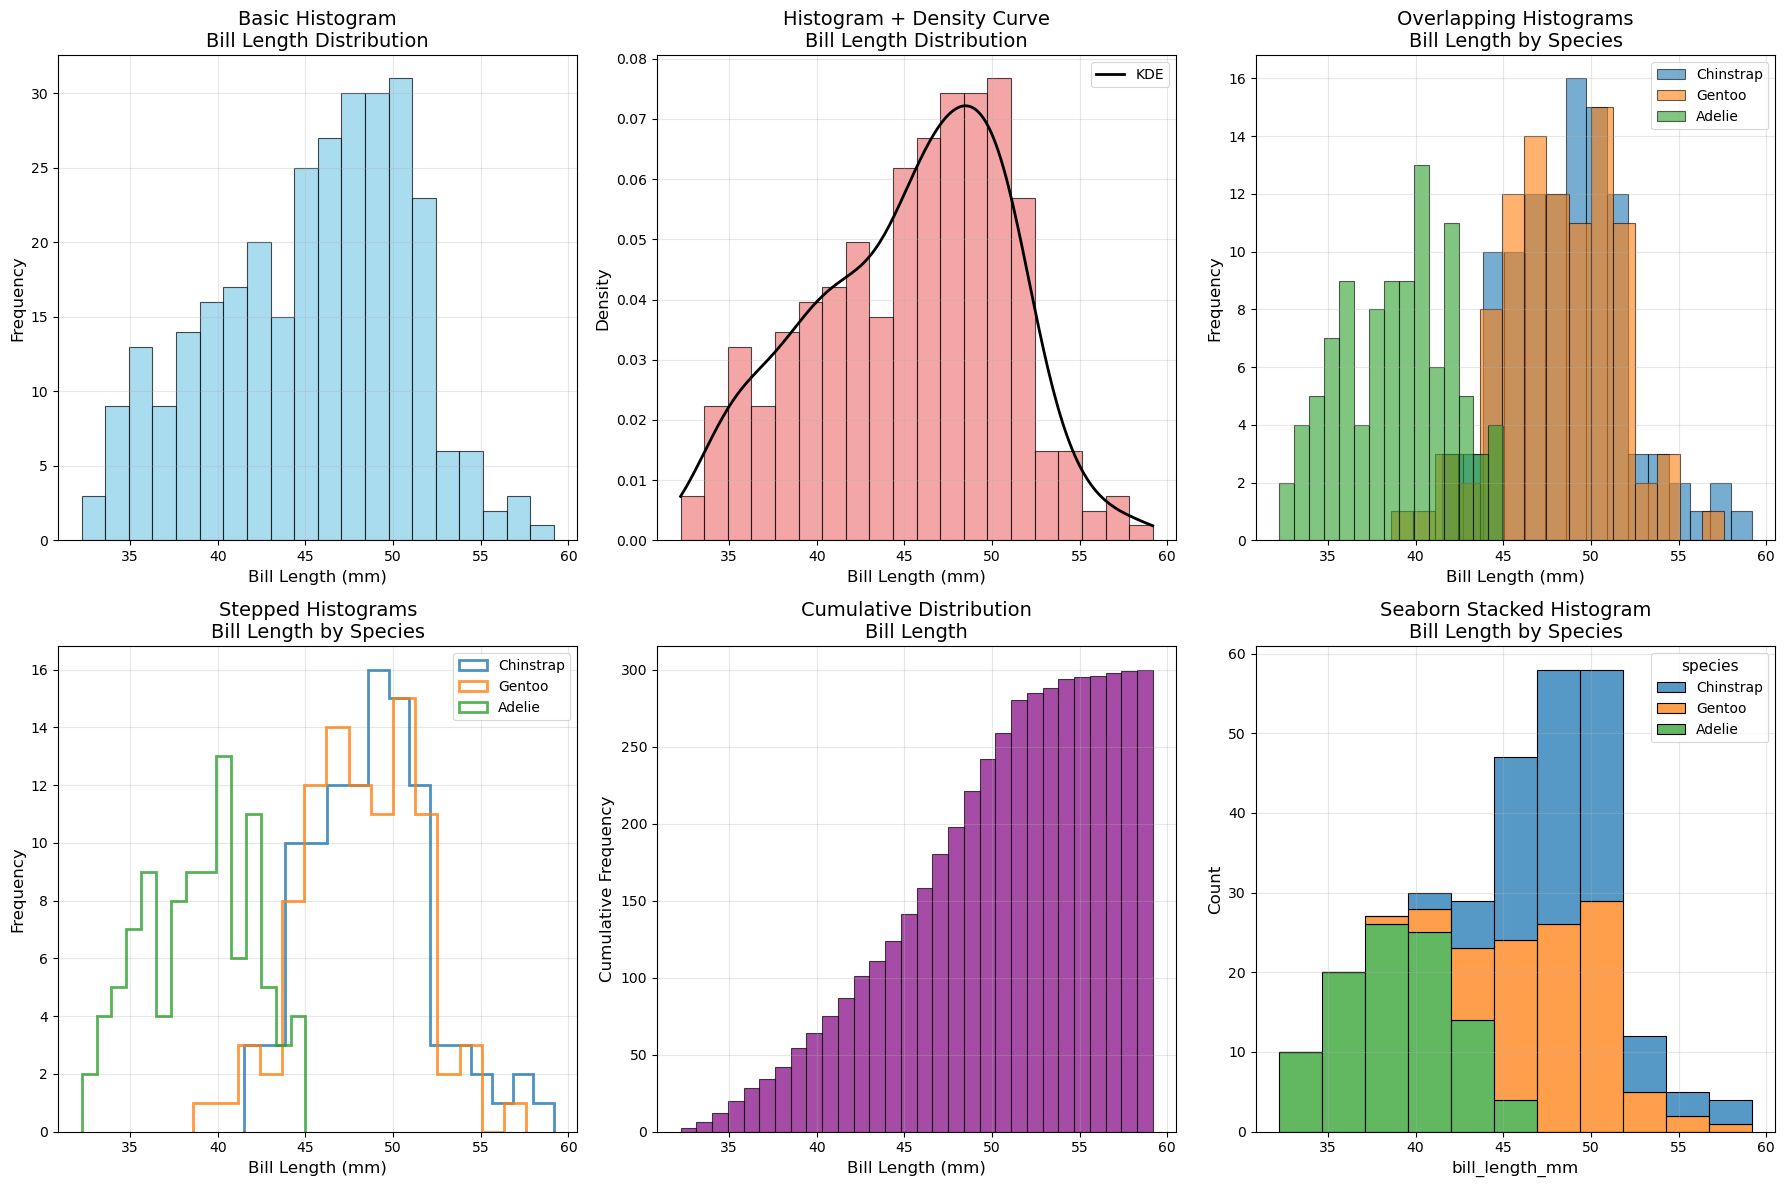

📊 DISTRIBUTION ANALYSIS:
📏 Bill Length Statistics:
   Mean: 45.28 mm
   Median: 46.17 mm
   Std Dev: 5.52 mm
   Skewness: -0.299
   Kurtosis: -0.600

🐧 By Species:
   Chinstrap: μ=48.6, σ=3.4 mm
   Gentoo: μ=48.2, σ=3.3 mm
   Adelie: μ=38.9, σ=3.1 mm


In [2]:
# 3.2 Histograms and Distribution Analysis

# Create a comprehensive histogram comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Clean data (remove any potential NaN values)
bill_length_clean = penguins['bill_length_mm'].dropna()
body_mass_clean = penguins['body_mass_g'].dropna()

# 1. Basic histogram
axes[0, 0].hist(bill_length_clean, bins=20, color='skyblue', 
                edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Basic Histogram\nBill Length Distribution')
axes[0, 0].set_xlabel('Bill Length (mm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram with density curve overlay
axes[0, 1].hist(bill_length_clean, bins=20, color='lightcoral', 
                alpha=0.7, density=True, edgecolor='black')
# Add kernel density estimate
bill_length_array = np.array(bill_length_clean)
density = stats.gaussian_kde(bill_length_array)
xs = np.linspace(bill_length_array.min(), bill_length_array.max(), 200)
axes[0, 1].plot(xs, density(xs), 'black', linewidth=2, label='KDE')
axes[0, 1].set_title('Histogram + Density Curve\nBill Length Distribution')
axes[0, 1].set_xlabel('Bill Length (mm)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Multiple histograms (by species) - overlapping
species_list = penguins['species'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['bill_length_mm'].dropna()
    axes[0, 2].hist(species_data, bins=15, alpha=0.6, 
                   label=species, color=colors[i], edgecolor='black')
axes[0, 2].set_title('Overlapping Histograms\nBill Length by Species')
axes[0, 2].set_xlabel('Bill Length (mm)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Stepped histogram (better for overlaps)
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['bill_length_mm'].dropna()
    axes[1, 0].hist(species_data, bins=15, alpha=0.8, 
                   label=species, color=colors[i], 
                   histtype='step', linewidth=2)
axes[1, 0].set_title('Stepped Histograms\nBill Length by Species')
axes[1, 0].set_xlabel('Bill Length (mm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Cumulative distribution
axes[1, 1].hist(bill_length_clean, bins=30, cumulative=True, 
                color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Cumulative Distribution\nBill Length')
axes[1, 1].set_xlabel('Bill Length (mm)')
axes[1, 1].set_ylabel('Cumulative Frequency')
axes[1, 1].grid(True, alpha=0.3)

# 6. Seaborn histogram with multiple features
sns.histplot(data=penguins, x='bill_length_mm', hue='species', 
             multiple='stack', ax=axes[1, 2])
axes[1, 2].set_title('Seaborn Stacked Histogram\nBill Length by Species')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("📊 DISTRIBUTION ANALYSIS:")
print(f"📏 Bill Length Statistics:")
print(f"   Mean: {bill_length_clean.mean():.2f} mm")
print(f"   Median: {bill_length_clean.median():.2f} mm")
print(f"   Std Dev: {bill_length_clean.std():.2f} mm")
print(f"   Skewness: {stats.skew(bill_length_clean):.3f}")
print(f"   Kurtosis: {stats.kurtosis(bill_length_clean):.3f}")

print(f"\n🐧 By Species:")
for species in species_list:
    species_data = penguins[penguins['species'] == species]['bill_length_mm'].dropna()
    print(f"   {species}: μ={species_data.mean():.1f}, σ={species_data.std():.1f} mm")

## 3.3 Box Plots and Violin Plots

Box plots and violin plots are excellent for comparing distributions across categories. Let's explore when to use each type and how to interpret them.

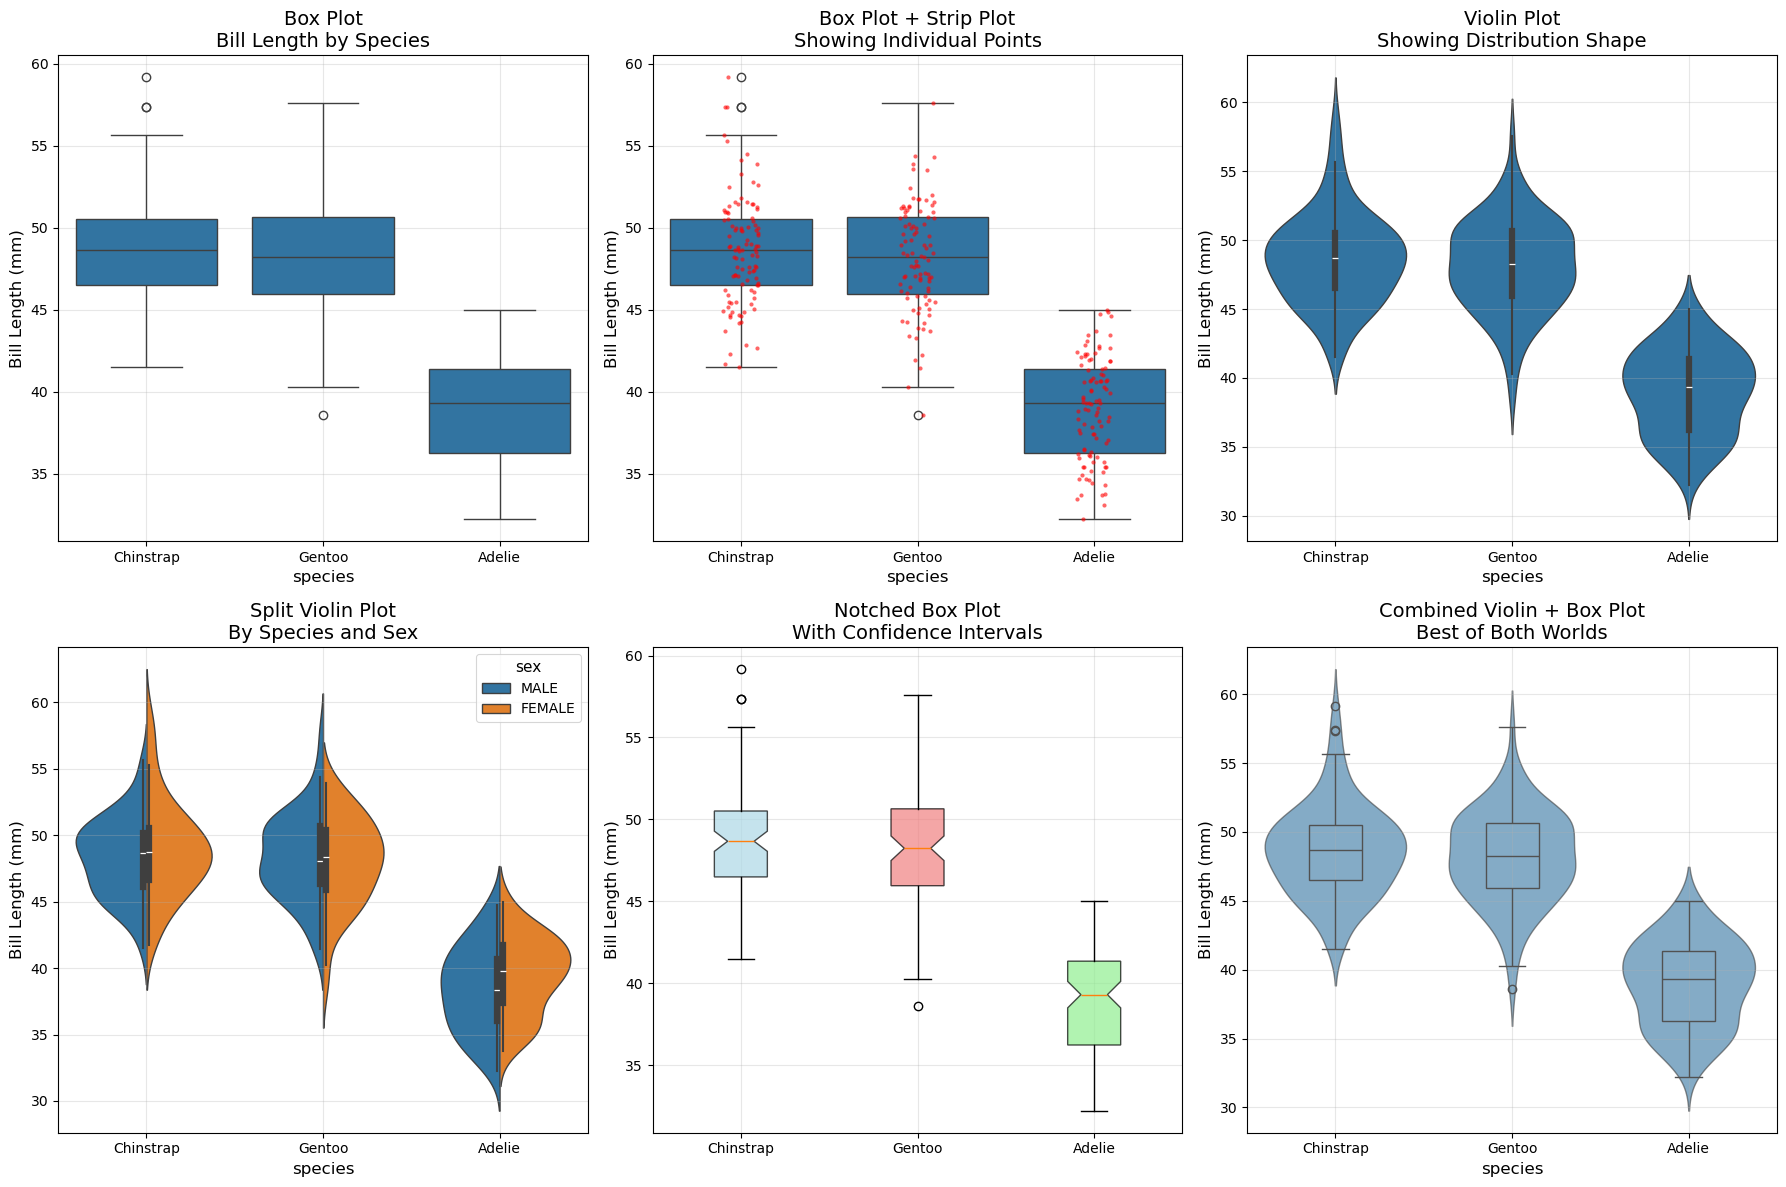

📦 BOX PLOT ELEMENTS EXPLAINED:
   📊 Box edges: 25th and 75th percentiles (Q1, Q3)
   📍 Center line: Median (50th percentile)
   📏 Whiskers: 1.5 × IQR from box edges
   🔴 Outliers: Points beyond whiskers
   🔔 Notches: Confidence interval around median

🎻 VIOLIN PLOT ADVANTAGES:
   📈 Shows full distribution shape (not just summary stats)
   🔍 Reveals multimodality, skewness, and density
   📊 Better for comparing distribution shapes

🎯 WHEN TO USE EACH:
   📦 Box plots: Quick summary statistics, outlier detection
   🎻 Violin plots: Understanding distribution shape
   🔗 Combined: Comprehensive view of data


In [3]:
# 3.3 Box Plots and Violin Plots Comparison

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Basic Box Plot
sns.boxplot(data=penguins, x='species', y='bill_length_mm', ax=axes[0, 0])
axes[0, 0].set_title('Box Plot\nBill Length by Species')
axes[0, 0].set_ylabel('Bill Length (mm)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Box Plot with individual points
sns.boxplot(data=penguins, x='species', y='bill_length_mm', ax=axes[0, 1])
sns.stripplot(data=penguins, x='species', y='bill_length_mm', 
              ax=axes[0, 1], color='red', alpha=0.6, size=3)
axes[0, 1].set_title('Box Plot + Strip Plot\nShowing Individual Points')
axes[0, 1].set_ylabel('Bill Length (mm)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Violin Plot
sns.violinplot(data=penguins, x='species', y='bill_length_mm', ax=axes[0, 2])
axes[0, 2].set_title('Violin Plot\nShowing Distribution Shape')
axes[0, 2].set_ylabel('Bill Length (mm)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Split Violin Plot by Sex
sns.violinplot(data=penguins, x='species', y='bill_length_mm', 
               hue='sex', split=True, ax=axes[1, 0])
axes[1, 0].set_title('Split Violin Plot\nBy Species and Sex')
axes[1, 0].set_ylabel('Bill Length (mm)')
axes[1, 0].grid(True, alpha=0.3)

# 5. Box Plot with notches (confidence intervals)
penguins_clean = penguins.dropna(subset=['bill_length_mm', 'species'])
species_groups = [penguins_clean[penguins_clean['species'] == species]['bill_length_mm'].values 
                 for species in penguins_clean['species'].unique()]
box_plot = axes[1, 1].boxplot(species_groups, 
                             labels=penguins_clean['species'].unique(),
                             notch=True, patch_artist=True)

# Color the boxes
colors = ['lightblue', 'lightcoral', 'lightgreen']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 1].set_title('Notched Box Plot\nWith Confidence Intervals')
axes[1, 1].set_ylabel('Bill Length (mm)')
axes[1, 1].grid(True, alpha=0.3)

# 6. Combined Box + Violin Plot
sns.violinplot(data=penguins, x='species', y='bill_length_mm', 
               inner=None, ax=axes[1, 2], alpha=0.6)
sns.boxplot(data=penguins, x='species', y='bill_length_mm', 
            ax=axes[1, 2], width=0.3, boxprops={'facecolor':'None'})
axes[1, 2].set_title('Combined Violin + Box Plot\nBest of Both Worlds')
axes[1, 2].set_ylabel('Bill Length (mm)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical comparison
print("📦 BOX PLOT ELEMENTS EXPLAINED:")
print("   📊 Box edges: 25th and 75th percentiles (Q1, Q3)")
print("   📍 Center line: Median (50th percentile)")
print("   📏 Whiskers: 1.5 × IQR from box edges")
print("   🔴 Outliers: Points beyond whiskers")
print("   🔔 Notches: Confidence interval around median")
print("")
print("🎻 VIOLIN PLOT ADVANTAGES:")
print("   📈 Shows full distribution shape (not just summary stats)")
print("   🔍 Reveals multimodality, skewness, and density")
print("   📊 Better for comparing distribution shapes")
print("")
print("🎯 WHEN TO USE EACH:")
print("   📦 Box plots: Quick summary statistics, outlier detection")
print("   🎻 Violin plots: Understanding distribution shape")
print("   🔗 Combined: Comprehensive view of data")

## 3.4 Probability Distributions and Q-Q Plots

Understanding whether your data follows a particular distribution is crucial for statistical analysis. Q-Q plots help us visually assess how well our data fits theoretical distributions.

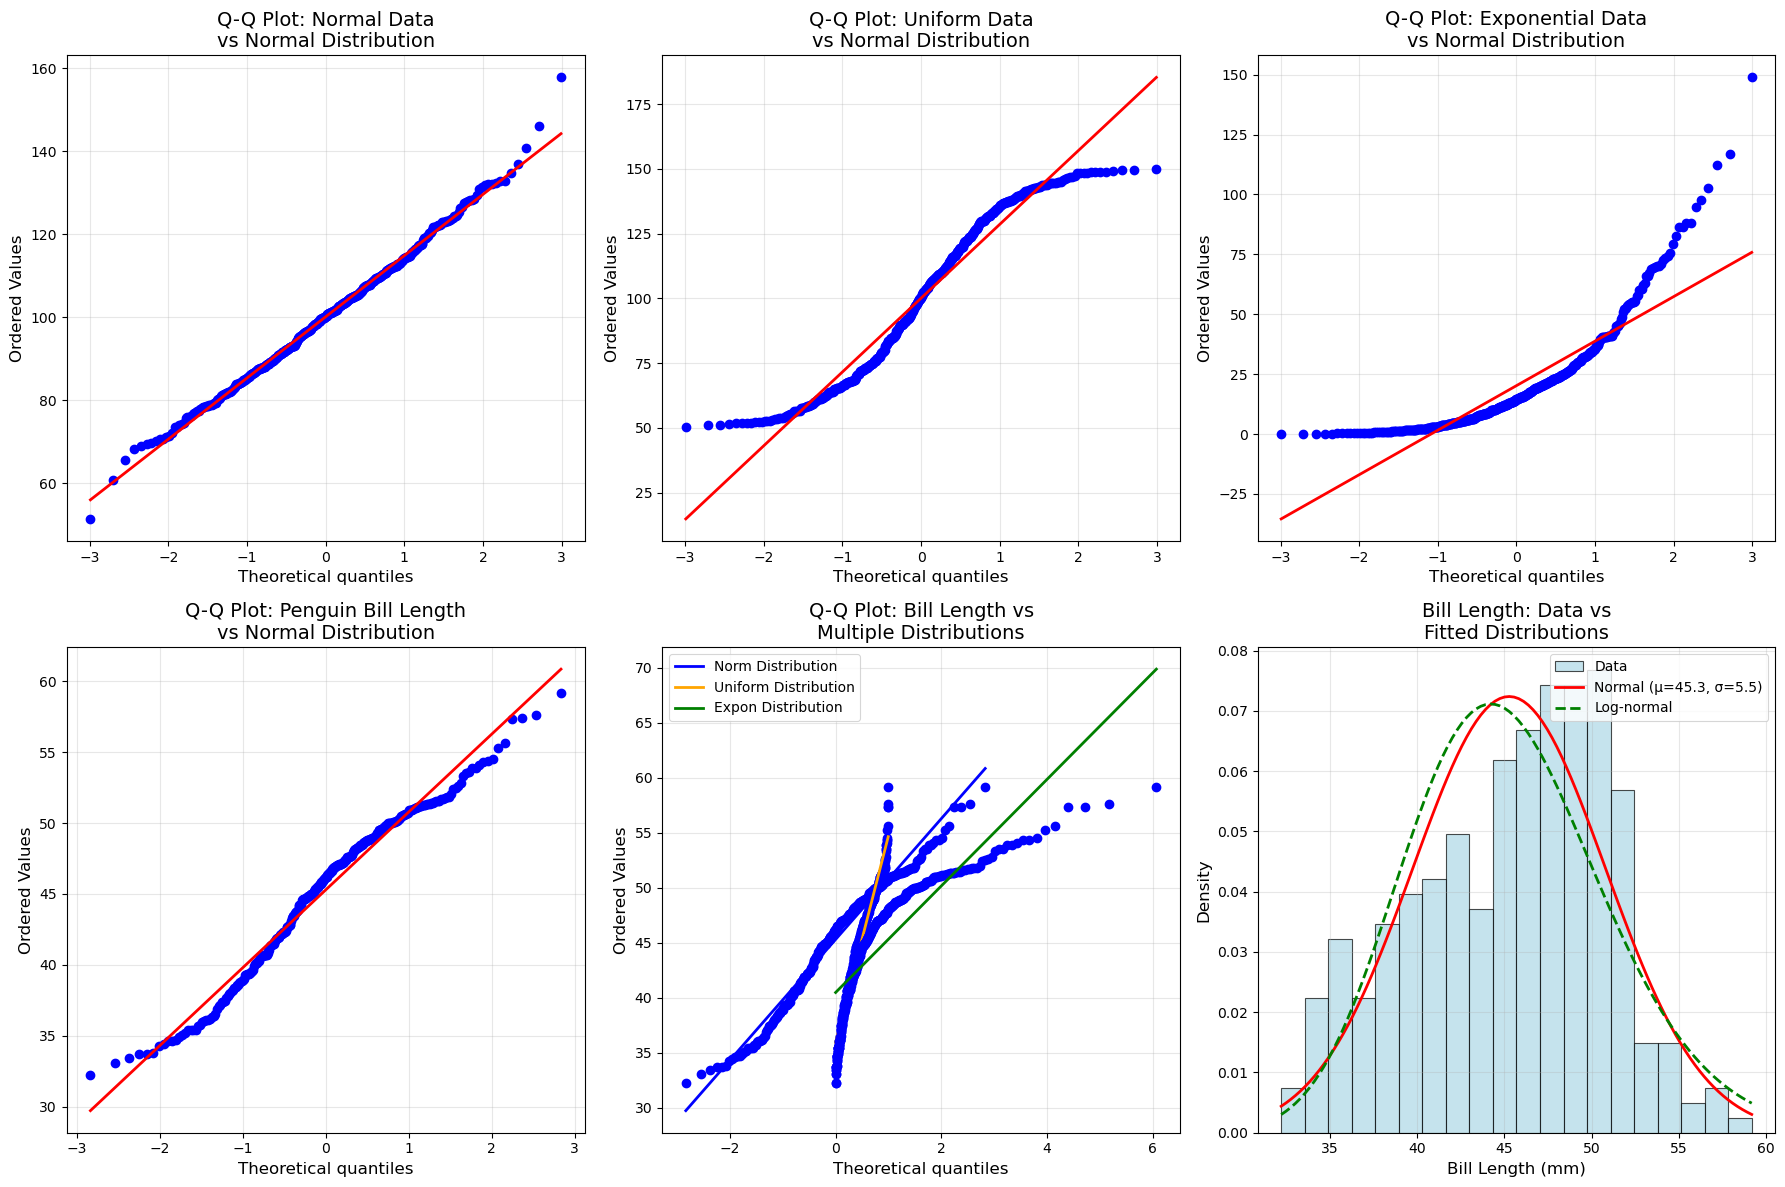

📊 NORMALITY TESTS FOR PENGUIN BILL LENGTH:
🔬 Shapiro-Wilk Test:
   Statistic: 0.9758
   P-value: 0.000060
   Interpretation: Not Normal (α = 0.05)

📏 Kolmogorov-Smirnov Test:
   Statistic: 0.0763
   P-value: 0.057793
   Interpretation: Normal (α = 0.05)

📐 Anderson-Darling Test:
   Statistic: 2.6338
   Critical value (5%): 0.7770
   Interpretation: Not Normal (α = 0.05)

🎯 Q-Q PLOT INTERPRETATION:
   📈 Straight line: Data follows the theoretical distribution
   📊 S-curve: Data is skewed compared to normal
   📉 Curved ends: Data has heavier/lighter tails
   🔄 Multiple curves: Data might be multimodal


In [4]:
# 3.4 Probability Distributions and Q-Q Plots

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Generate different types of data for comparison
np.random.seed(42)
normal_data = np.random.normal(100, 15, 500)
uniform_data = np.random.uniform(50, 150, 500)
exponential_data = np.random.exponential(20, 500)

# Use actual penguin data
bill_length_data = penguins['bill_length_mm'].dropna().values

# 1. Q-Q Plot for Normal Data
stats.probplot(normal_data, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot: Normal Data\nvs Normal Distribution')
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q Plot for Uniform Data against Normal
stats.probplot(uniform_data, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot: Uniform Data\nvs Normal Distribution')
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q Plot for Exponential Data against Normal
stats.probplot(exponential_data, dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Q-Q Plot: Exponential Data\nvs Normal Distribution')
axes[0, 2].grid(True, alpha=0.3)

# 4. Q-Q Plot for Bill Length Data
stats.probplot(bill_length_data, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: Penguin Bill Length\nvs Normal Distribution')
axes[1, 0].grid(True, alpha=0.3)

# 5. Multiple distributions comparison for bill length
distributions = ['norm', 'uniform', 'expon']
colors = ['blue', 'orange', 'green']

for i, (dist, color) in enumerate(zip(distributions, colors)):
    try:
        stats.probplot(bill_length_data, dist=dist, plot=axes[1, 1])
        # Get the line for this distribution
        line = axes[1, 1].get_lines()[-1]
        line.set_color(color)
        line.set_label(f'{dist.capitalize()} Distribution')
    except:
        pass

axes[1, 1].set_title('Q-Q Plot: Bill Length vs\nMultiple Distributions')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Distribution fitting comparison
# Fit normal distribution to bill length data
mu, sigma = stats.norm.fit(bill_length_data)
x = np.linspace(bill_length_data.min(), bill_length_data.max(), 100)

# Plot histogram with fitted distributions
axes[1, 2].hist(bill_length_data, bins=20, density=True, alpha=0.7, 
                color='lightblue', edgecolor='black', label='Data')

# Overlay fitted normal distribution
axes[1, 2].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, 
                label=f'Normal (μ={mu:.1f}, σ={sigma:.1f})')

# Try log-normal fit
shape, loc, scale = stats.lognorm.fit(bill_length_data, floc=0)
axes[1, 2].plot(x, stats.lognorm.pdf(x, shape, loc, scale), 'g--', linewidth=2,
                label=f'Log-normal')

axes[1, 2].set_title('Bill Length: Data vs\nFitted Distributions')
axes[1, 2].set_xlabel('Bill Length (mm)')
axes[1, 2].set_ylabel('Density')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical tests for normality
print("📊 NORMALITY TESTS FOR PENGUIN BILL LENGTH:")
print("=" * 50)

# Shapiro-Wilk test (best for n < 5000)
shapiro_stat, shapiro_p = stats.shapiro(bill_length_data)
print(f"🔬 Shapiro-Wilk Test:")
print(f"   Statistic: {shapiro_stat:.4f}")
print(f"   P-value: {shapiro_p:.6f}")
print(f"   Interpretation: {'Normal' if shapiro_p > 0.05 else 'Not Normal'} (α = 0.05)")

# Kolmogorov-Smirnov test
ks_stat, ks_p = stats.kstest(bill_length_data, 'norm', args=(mu, sigma))
print(f"\n📏 Kolmogorov-Smirnov Test:")
print(f"   Statistic: {ks_stat:.4f}")
print(f"   P-value: {ks_p:.6f}")
print(f"   Interpretation: {'Normal' if ks_p > 0.05 else 'Not Normal'} (α = 0.05)")

# Anderson-Darling test
ad_stat, ad_critical, ad_significance = stats.anderson(bill_length_data, 'norm')
print(f"\n📐 Anderson-Darling Test:")
print(f"   Statistic: {ad_stat:.4f}")
print(f"   Critical value (5%): {ad_critical[2]:.4f}")
print(f"   Interpretation: {'Normal' if ad_stat < ad_critical[2] else 'Not Normal'} (α = 0.05)")

print(f"\n🎯 Q-Q PLOT INTERPRETATION:")
print("   📈 Straight line: Data follows the theoretical distribution")
print("   📊 S-curve: Data is skewed compared to normal")
print("   📉 Curved ends: Data has heavier/lighter tails")
print("   🔄 Multiple curves: Data might be multimodal")

## 3.5 Hands-On Exercise: Statistical Analysis

**Your Task:** Create a comprehensive statistical analysis of penguin body mass using all the techniques we've learned.

**Requirements:**
1. Create multiple histogram views
2. Compare distributions across species using box plots and violin plots
3. Test for normality using Q-Q plots and statistical tests
4. Apply accessibility principles from Module 2

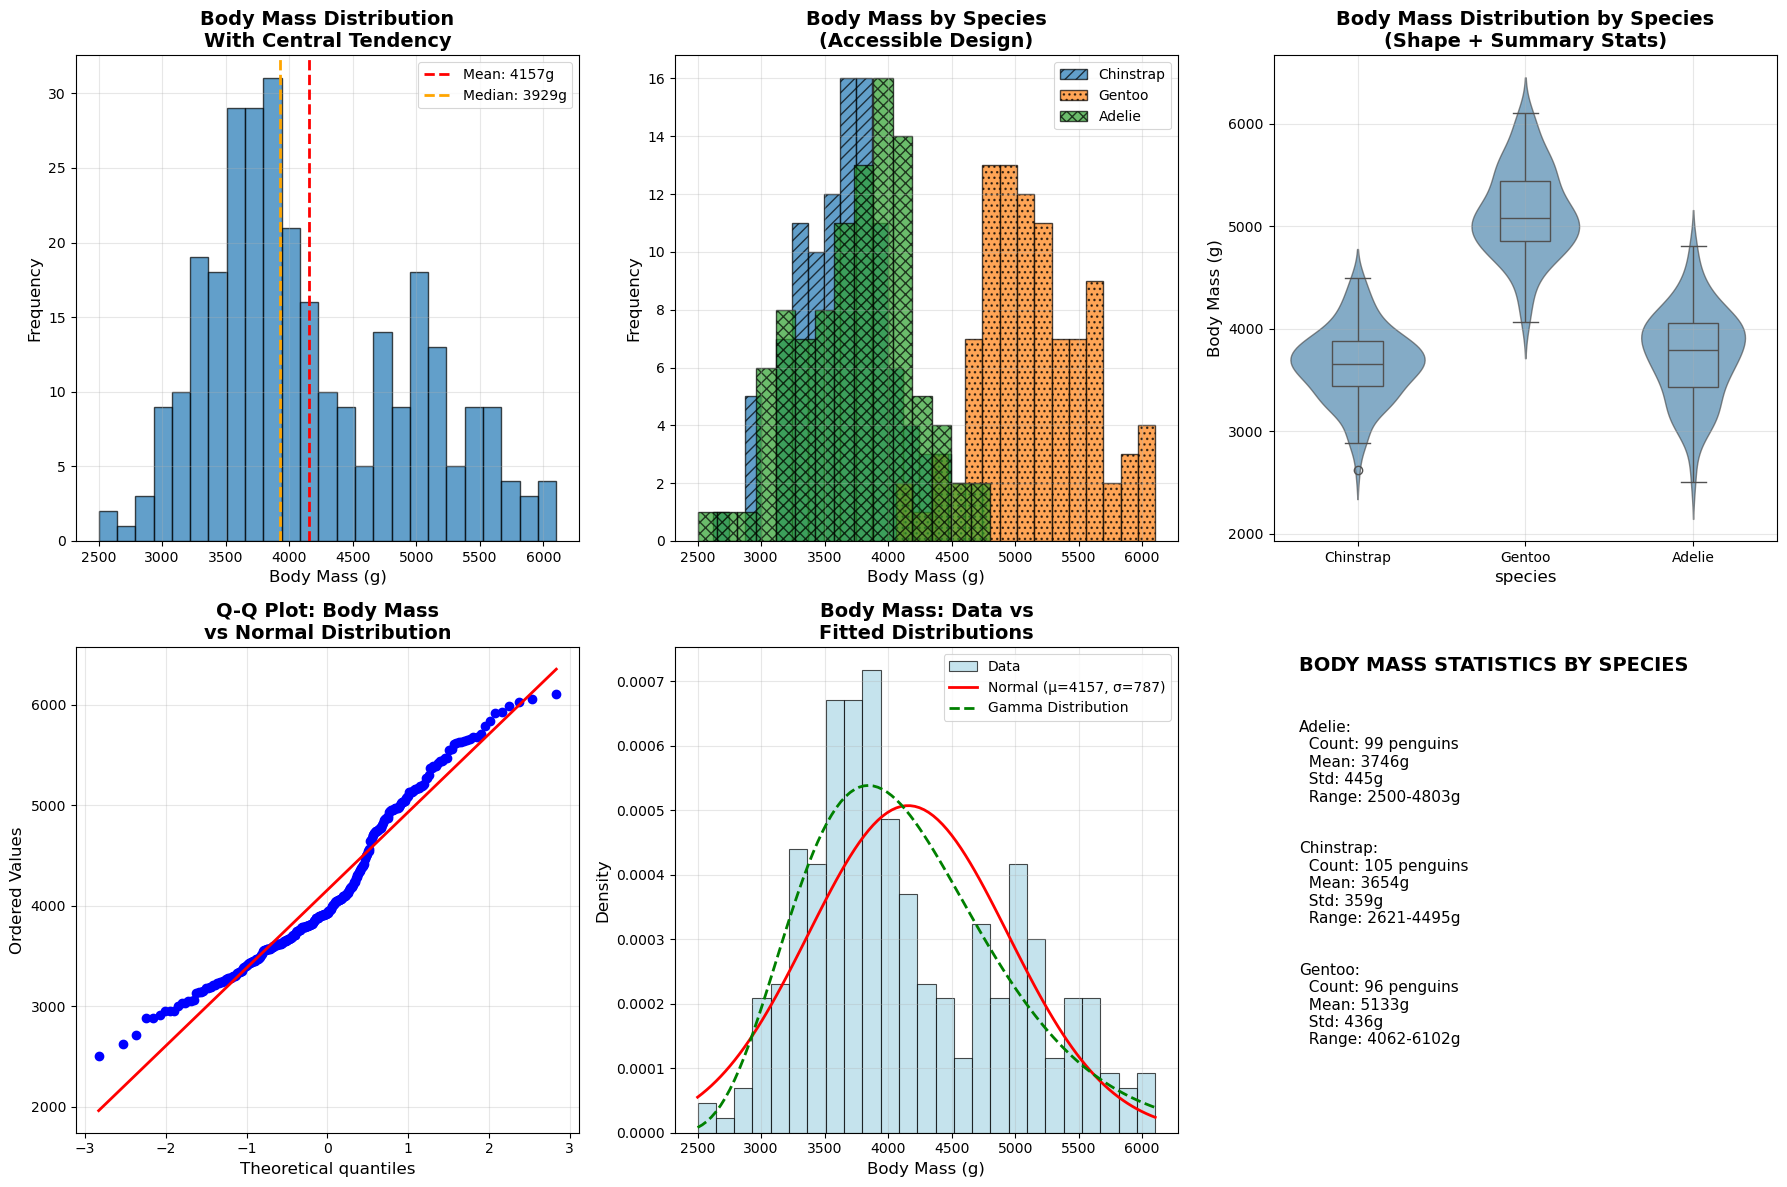

📊 COMPREHENSIVE BODY MASS ANALYSIS
📏 Overall Statistics:
   Sample size: 300 penguins
   Mean: 4157.3g
   Median: 3929.3g
   Standard deviation: 787.8g
   Skewness: 0.517
   Kurtosis: -0.624

🔬 Normality Tests:
   Shapiro-Wilk: statistic=0.9541, p=0.000000
   Interpretation: Not Normal

🐧 Species Comparison (ANOVA):
   F-statistic: 393.1924
   P-value: 0.000000
   Interpretation: Significant difference between species

✅ ACCESSIBILITY FEATURES IMPLEMENTED:
   🎨 Colorblind-friendly palette
   📊 Patterns/hatching for redundant encoding
   📏 Direct value labels and statistics
   🔲 High-contrast borders
   📋 Comprehensive statistical reporting


In [5]:
# 3.5 Exercise Solution: Comprehensive Body Mass Analysis

# Comprehensive analysis of penguin body mass
body_mass_clean = penguins['body_mass_g'].dropna()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Basic histogram with accessibility features
axes[0, 0].hist(body_mass_clean, bins=25, color='#1f77b4', alpha=0.7, 
                edgecolor='black', linewidth=1)
axes[0, 0].axvline(body_mass_clean.mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {body_mass_clean.mean():.0f}g')
axes[0, 0].axvline(body_mass_clean.median(), color='orange', linestyle='--', 
                   linewidth=2, label=f'Median: {body_mass_clean.median():.0f}g')
axes[0, 0].set_title('Body Mass Distribution\nWith Central Tendency', fontweight='bold')
axes[0, 0].set_xlabel('Body Mass (g)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram by species with patterns (accessibility)
species_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
species_patterns = ['///', '...', 'xxx']
for i, species in enumerate(penguins['species'].unique()):
    species_data = penguins[penguins['species'] == species]['body_mass_g'].dropna()
    axes[0, 1].hist(species_data, bins=15, alpha=0.7, label=species,
                   color=species_colors[i], hatch=species_patterns[i],
                   edgecolor='black', linewidth=1)
axes[0, 1].set_title('Body Mass by Species\n(Accessible Design)', fontweight='bold')
axes[0, 1].set_xlabel('Body Mass (g)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Combined violin and box plot
sns.violinplot(data=penguins, x='species', y='body_mass_g', 
               inner=None, ax=axes[0, 2], alpha=0.6)
sns.boxplot(data=penguins, x='species', y='body_mass_g', 
            ax=axes[0, 2], width=0.3, boxprops={'facecolor':'None'})
axes[0, 2].set_title('Body Mass Distribution by Species\n(Shape + Summary Stats)', 
                     fontweight='bold')
axes[0, 2].set_ylabel('Body Mass (g)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Q-Q plot for normality assessment
stats.probplot(body_mass_clean, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: Body Mass\nvs Normal Distribution', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 5. Distribution fitting
mu_mass, sigma_mass = stats.norm.fit(body_mass_clean)
x_mass = np.linspace(body_mass_clean.min(), body_mass_clean.max(), 100)

axes[1, 1].hist(body_mass_clean, bins=25, density=True, alpha=0.7, 
                color='lightblue', edgecolor='black', label='Data')
axes[1, 1].plot(x_mass, stats.norm.pdf(x_mass, mu_mass, sigma_mass), 
                'r-', linewidth=2, label=f'Normal (μ={mu_mass:.0f}, σ={sigma_mass:.0f})')

# Try skewed normal (approximation with gamma)
try:
    alpha_gamma, loc_gamma, scale_gamma = stats.gamma.fit(body_mass_clean)
    axes[1, 1].plot(x_mass, stats.gamma.pdf(x_mass, alpha_gamma, loc_gamma, scale_gamma), 
                    'g--', linewidth=2, label='Gamma Distribution')
except:
    pass

axes[1, 1].set_title('Body Mass: Data vs\nFitted Distributions', fontweight='bold')
axes[1, 1].set_xlabel('Body Mass (g)')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Statistical summary by species
species_stats = penguins.groupby('species')['body_mass_g'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(0)

# Create a text-based summary plot
axes[1, 2].axis('off')
axes[1, 2].text(0.05, 0.95, 'BODY MASS STATISTICS BY SPECIES', 
                transform=axes[1, 2].transAxes, fontsize=14, fontweight='bold')

y_pos = 0.85
for species in species_stats.index:
    stats_text = f"""{species}:
  Count: {species_stats.loc[species, 'count']:.0f} penguins
  Mean: {species_stats.loc[species, 'mean']:.0f}g
  Std: {species_stats.loc[species, 'std']:.0f}g
  Range: {species_stats.loc[species, 'min']:.0f}-{species_stats.loc[species, 'max']:.0f}g
"""
    axes[1, 2].text(0.05, y_pos, stats_text, transform=axes[1, 2].transAxes, 
                    fontsize=11, verticalalignment='top')
    y_pos -= 0.25

plt.tight_layout()
plt.show()

# Comprehensive statistical tests
print("📊 COMPREHENSIVE BODY MASS ANALYSIS")
print("=" * 50)

print(f"📏 Overall Statistics:")
print(f"   Sample size: {len(body_mass_clean)} penguins")
print(f"   Mean: {body_mass_clean.mean():.1f}g")
print(f"   Median: {body_mass_clean.median():.1f}g")
print(f"   Standard deviation: {body_mass_clean.std():.1f}g")
print(f"   Skewness: {stats.skew(body_mass_clean):.3f}")
print(f"   Kurtosis: {stats.kurtosis(body_mass_clean):.3f}")

print(f"\n🔬 Normality Tests:")
shapiro_stat, shapiro_p = stats.shapiro(body_mass_clean)
print(f"   Shapiro-Wilk: statistic={shapiro_stat:.4f}, p={shapiro_p:.6f}")
print(f"   Interpretation: {'Normal' if shapiro_p > 0.05 else 'Not Normal'}")

print(f"\n🐧 Species Comparison (ANOVA):")
adelie_mass = penguins[penguins['species'] == 'Adelie']['body_mass_g'].dropna()
chinstrap_mass = penguins[penguins['species'] == 'Chinstrap']['body_mass_g'].dropna()
gentoo_mass = penguins[penguins['species'] == 'Gentoo']['body_mass_g'].dropna()

f_stat, f_p = stats.f_oneway(adelie_mass, chinstrap_mass, gentoo_mass)
print(f"   F-statistic: {f_stat:.4f}")
print(f"   P-value: {f_p:.6f}")
print(f"   Interpretation: {'Significant difference' if f_p < 0.05 else 'No significant difference'} between species")

print(f"\n✅ ACCESSIBILITY FEATURES IMPLEMENTED:")
print("   🎨 Colorblind-friendly palette")
print("   📊 Patterns/hatching for redundant encoding")
print("   📏 Direct value labels and statistics")
print("   🔲 High-contrast borders")
print("   📋 Comprehensive statistical reporting")

## 📋 Module 3 Summary: Statistical Plots & Distributions

### Key Techniques Mastered:
✅ **Histograms**: Basic, density curves, overlapping, stepped, cumulative  
✅ **Box Plots**: Standard, notched, strip plots, outlier detection  
✅ **Violin Plots**: Distribution shapes, split plots, combined with box plots  
✅ **Q-Q Plots**: Normality assessment, distribution comparison  
✅ **Statistical Tests**: Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling  
✅ **Distribution Fitting**: Normal, log-normal, gamma distributions  

### When to Use Each Plot Type:

| Plot Type | Best For | Strengths | Limitations |
|-----------|----------|-----------|-------------|
| **Histogram** | Single variable distribution | Shows frequency, easy to understand | Bin choice affects appearance |
| **Box Plot** | Comparing groups, outliers | Summarizes 5-number summary | Hides distribution shape |
| **Violin Plot** | Distribution shapes | Shows full density | Can be hard to interpret |
| **Q-Q Plot** | Testing normality | Clear departure patterns | Requires statistical knowledge |

### Statistical Insights from Penguin Data:
- **Bill Length**: Roughly normal within species, multimodal overall
- **Body Mass**: Right-skewed, significant species differences
- **Species Effects**: Major factor in all measurements (ANOVA p < 0.001)

### Accessibility Principles Applied:
- Colorblind-friendly palettes throughout
- Pattern/texture encoding for redundancy
- Direct value labels where appropriate
- High-contrast borders and grids
- Comprehensive statistical reporting

### Next Steps:
Ready for **Module 4: Time Series Visualization** where we'll explore temporal patterns and trends!

---
*"In God we trust. All others must bring data." - W. Edwards Deming* 📊